## Operações Morfológicas

In [23]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

## 1. Operações 

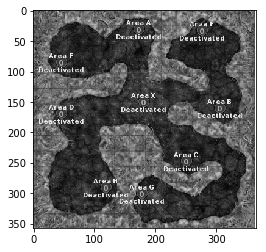

In [24]:
#Carrega a imagem e a coloca em escala de cinza
img = cv2.imread('danteCQ.PNG')
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img,cmap = 'gray')

In [25]:
#Inicializa o Kernel
kernel = np.ones((3,3),np.uint8)
timg = img.copy()

Text(0.5, 1.0, 'Original')

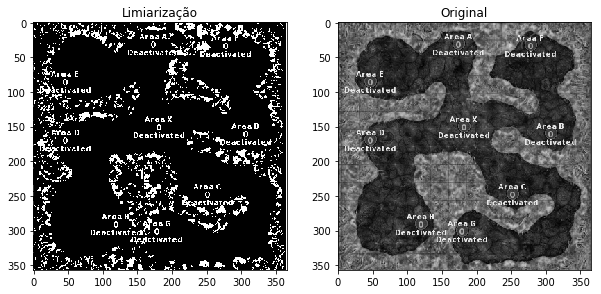

In [26]:
#LIMIARIZAÇÃO
_,thresh = cv2.threshold(timg,128,1,cv2.THRESH_BINARY)



plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(thresh,cmap = 'gray')
plt.title('Limiarização')

plt.subplot(1,2,2)
plt.imshow(img,cmap = 'gray')
plt.title('Original')

Digite o número de iterações:
1


Text(0.5, 1.0, 'Original')

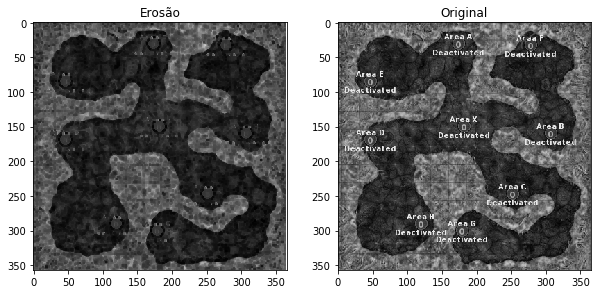

In [27]:
#EROSÃO
it = input('Digite o número de iterações:\n')
erosion = cv2.erode(timg,kernel, iterations = int(it))

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(erosion,cmap = 'gray')
plt.title('Erosão')

plt.subplot(1,2,2)
plt.imshow(img,cmap = 'gray')
plt.title('Original')
#-> "Mata as linha finas"

Digite o número de iterações:
1


Text(0.5, 1.0, 'Original')

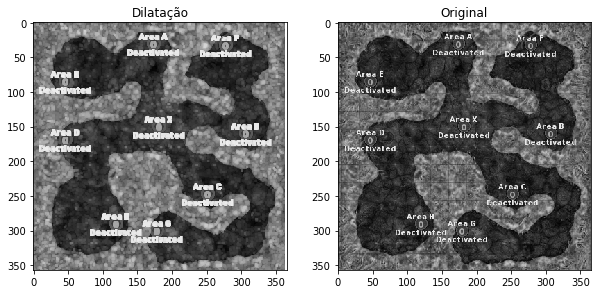

In [28]:
# DILATAÇÃO
it = input ('Digite o número de iterações:\n')
dilate = cv2.dilate(timg,kernel,iterations = int(it))

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(dilate,cmap = 'gray')
plt.title('Dilatação')

plt.subplot(1,2,2)
plt.imshow(img,cmap = 'gray')
plt.title('Original')
#-> "Incha as linhas finas"

Digite o número de iterações:
1


Text(0.5, 1.0, 'Original')

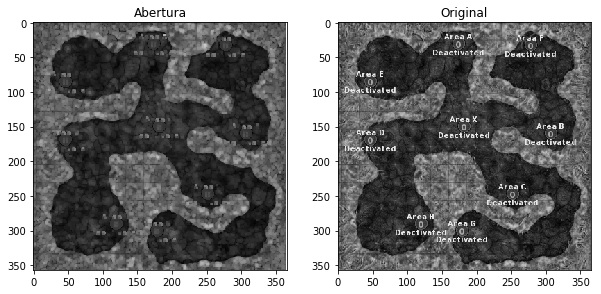

In [29]:
#ABERTURA
it = input('Digite o número de iterações:\n')
open = cv2.morphologyEx(timg,cv2.MORPH_OPEN,kernel,iterations = int(it))

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(open,cmap = 'gray')
plt.title('Abertura')

plt.subplot(1,2,2)
plt.imshow(img,cmap = 'gray')
plt.title('Original')
#"Abre buracos, um 'A' por exemplo tem seu meio aberto e as linhas finas reduzidas sumindo"

Digite o número de iterações:
1


Text(0.5, 1.0, 'Original')

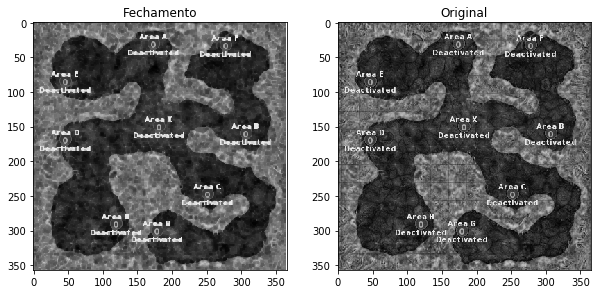

In [30]:
#FECHAMENTO
it = input('Digite o número de iterações:\n')
close = cv2.morphologyEx(timg,cv2.MORPH_CLOSE,kernel,iterations = int(it))

plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
plt.imshow(close,cmap = 'gray')
plt.title('Fechamento')

plt.subplot(1,2,2)
plt.imshow(img,cmap = 'gray')
plt.title('Original')
#Fecha os buracos

## 2.Análise da Placa de Carro

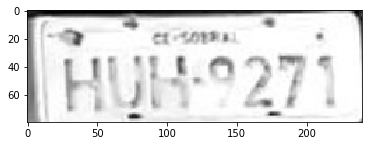

In [31]:
#Carrega a imagem
img = cv2.imread('HUH9271.png')
plt.imshow(img)
timg = img.copy()

In [32]:
timg = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
timg.shape

(80, 240)

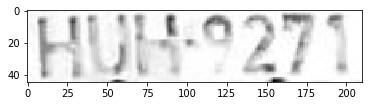

In [33]:
#Corta a parte da placa
timg = timg[30:75,20:230]
plt.imshow(timg,cmap = 'gray')

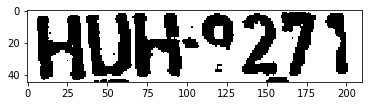

In [34]:
#Limiariza 
_,timg = cv2.threshold(timg,235,255,cv2.THRESH_BINARY)
plt.imshow(timg,cmap = 'gray')

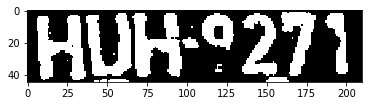

In [35]:
#Aplica o Negativo
timg = timg.astype(np.float)
timg = timg - 255
timg = abs(timg)
timg = timg.astype(np.uint8)
plt.imshow(timg,cmap = 'gray')

In [36]:
#Inicializa o Kernel
kernel = np.ones((3,3),np.uint8)

In [37]:
#Operações Morfológicas
def funcoes(mode,it,img):
    if mode == 1:
        opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel,iterations = int(it))
        return opening
    elif mode == 2:
        closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel,iterations = int(it))
        return closing
    elif mode == 3:
        erosion = cv2.erode(img,kernel,iterations = int(it))
        return erosion
    elif mode == 4:
        dilate = cv2.dilate(img,kernel,iterations = int(it))
        return dilate
    else :
        return img
    

In [38]:
#Função de Seleção
def opMorfologica(img,op):
    preview = img
    mode = input('''Selecione uma opção ou uma sequencia de opções a partir de :
                 \n 1 : Abertura \n 2 : Fechamento \n 3 : Erosão \n 4 : Dilatação \n''')
    
    mode = mode.replace(' ','')
    mode = mode.replace(',','')
    it = input(''' Digite uma quantidade de iterações mínima de 1 para as opções selecionadas: \n''')
    it = it.replace(' ','')
    it = it.replace(',','')
    
    if len(mode) != len(it):
        print("Numero de iteraçoes invalido")
        return -1
    op.append((mode,it))
    for i in range (len(mode)):
        img = funcoes(int(mode[i]),int(it[i]),img)
        

    return img,preview

In [39]:
#Inicio e Reset
preview = timg
view = timg
operations = []

In [ ]:
#Volta a última operação
answer = input('Digite zero se o resultado não foi ok! ')
if answer == '0':
    preview = result[1]
    operations = operations[0:len(operations)-1]
    

Selecione uma opção ou uma sequencia de opções a partir de :
                 
 1 : Abertura 
 2 : Fechamento 
 3 : Erosão 
 4 : Dilatação 
2,4,1,3
 Digite uma quantidade de iterações mínima de 1 para as opções selecionadas: 
1,1,1,1


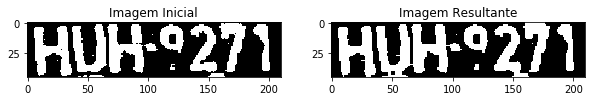

In [40]:
# Chama as funções
result = opMorfologica(preview,operations)
view = result[0]
preview = result[1]

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(preview,cmap = 'gray')
plt.title('Imagem Inicial')
plt.subplot(1,2,2)
plt.imshow(view,cmap = 'gray')
plt.title('Imagem Resultante')
preview = view


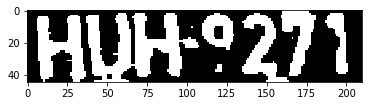

In [41]:
plt.imshow(preview,cmap = 'gray')

In [42]:
operations

[('2413', '1111')]

In [43]:
dici = {1:'Abertura',2:'Fechamento',3:'Erosão',4:'Dilatação'}

In [44]:
for i in range (len(operations)) :
    for j in range (len(operations[i][0])):    
        print('{} -> Iterações : {}'.format(dici[int(operations[i][0][j])],int(operations[i][1][j])))

Fechamento -> Iterações : 1
Dilatação -> Iterações : 1
Abertura -> Iterações : 1
Erosão -> Iterações : 1
